# Problem Set #4 - Michael 

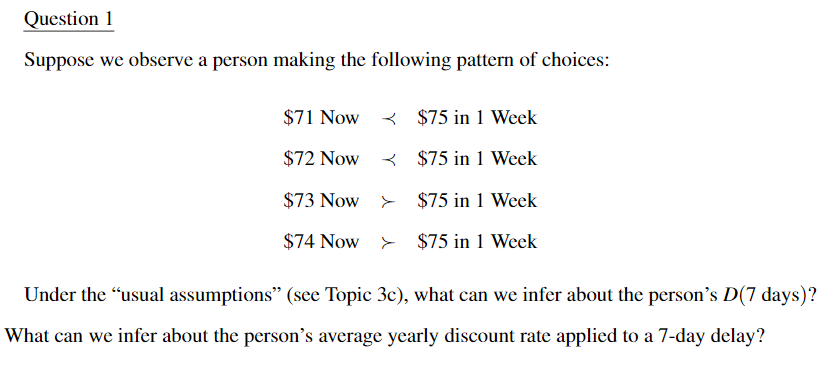

<!-- Usual assumptions: Loss aversion, diminishing sensitivity, relativity to gains -->
If we go through the descisions:
$$
D(0)= 1
D(7)>\frac{v(72)}{v(75)}\\
D(7)<\frac{v(73)}{v(75)}\\
$$
So $D(7)$ is between $.96$ and $.9733$.

This yields $\rho = 52/7 (-\ln(.97))=22.6\%$

<!-- 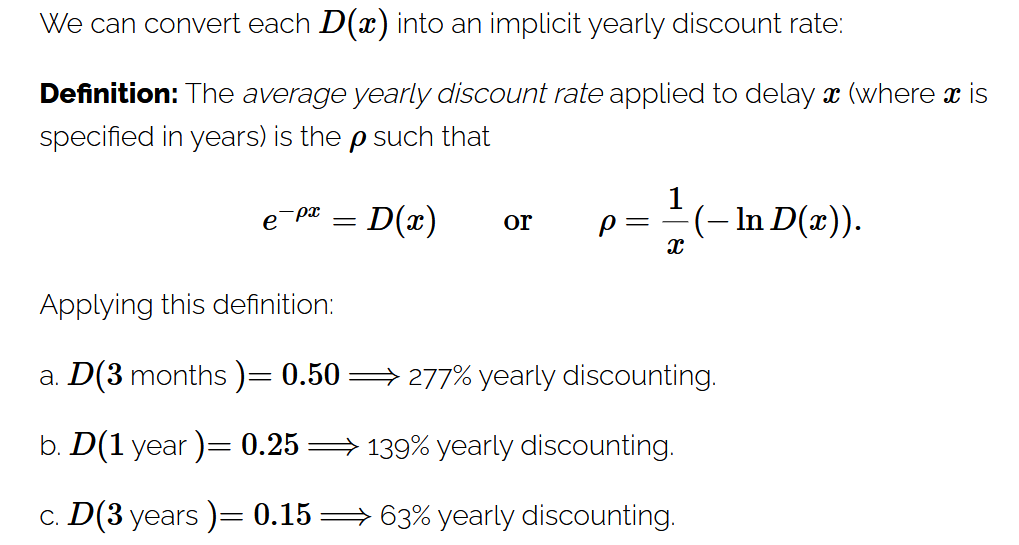 -->

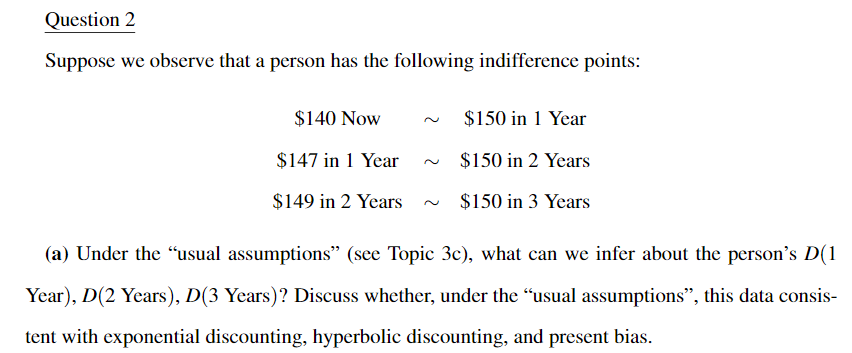

"Usual assumptions:" $v(x)=x$ and no expectation utility. With exponential discounting we have
$$
D(1)/D(0) = \frac{140}{150}= .933\\
D(2)/D(1) = \frac{147}{150}=.98 \\
D(3)/D(2) = \frac{149}{150}=.993
$$
Exponential discounting assumes each of these are equivalent, but they vary quite greatly. Lets consider the other two. Pure hyperbolic discounting implies $D(x)=\frac{1}{1+kx}$, with $\frac{D(x)}{D(x-1)}=\frac{1+kx-k}{1+kx}=1-\frac{k}{1+kx}$
$$
\frac{k}{1+k} = 1-.933 \implies k = 0.0718 \\
\frac{k}{1+2k} = 1-.98 \implies k = 0.02 \\
\frac{k}{1+3k} = 1-.993 \implies k = 0.007
$$
No luck here either. The 5% change in discounting from .93 to .98 is best explained by present bias, that money now is much more valuble than future money. Even so, there's still unexpected change between $D(2)$ and $D(3)$ for both models.


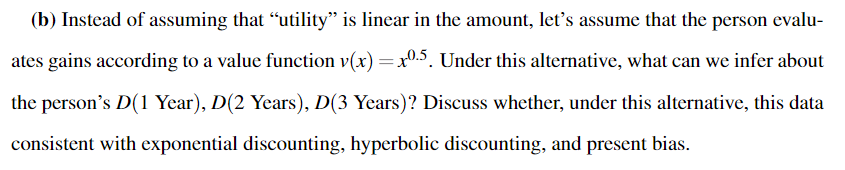

Now $v(140,147,149,150)=11.83,12.12,12.21,12.25$

Adjusting the previous ratios in exponential discounting we have
$$ 
11.83/12.25 = .966 \\
12.12/12.25 = .989 \\
12.21/12.25 = .997
$$
While more closely packed, there's still a general lack of consistency and the issues present in part (a) are stil present here.

For hyperbolic this yields k values of
$$
\frac{k}{1+k} = 1- .966 \implies k = 0.004 \\
\frac{k}{1+2k} = 1-.989 \implies k = 0.011 \\
\frac{k}{1+3k} = 1-.997 \implies k = 0.003
$$

Okay still not quite consistent, but it doesn't vary by an order of magnitude. I still believe present bias + exponential discounting is most consistent, but it still misses something

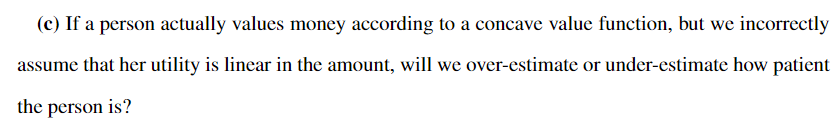

We will under-estimate, since we predict a greater discount rate for linear in part a compared to our prediction for a concave function in part b. This makes sense considering that we'll think they're putting too much weight into lower, instant values when really their value function states that further increases in wealth aren't as highly weighted

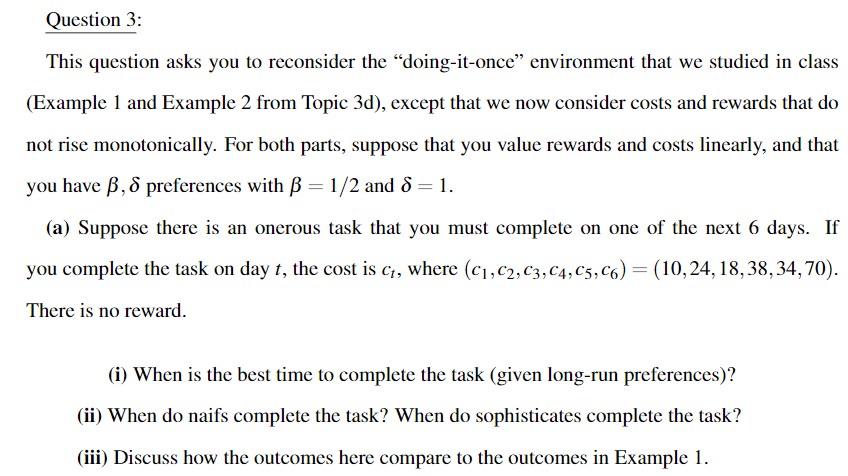

Lets compute! If we were a souless and ideal corporate entity with vast wealth, we'd do it on the first day since that is when costs are lowest. However, we discount the future costs according to $U(t) = \beta_{t\neq 1} \delta^{t-1} v(c_t) $ which becomes
$$U(t) = \begin{cases} c_t & t=1 \\ \beta c_t & t>1 \end{cases}$$
where t is the action date. Remember we are in costs, so we want to minimize U

$$
U(1) = 10,\ 
U(2) = 12, \\
U(3) = 9, \ 
U(4) = 19, \\
U(5) = 17, \ 
U(6) = 35,
$$

(i) clearly we want to do it on $c_3$, the lowest cost

(ii) A naif won't succeed in completion in $c_3$, since by then $U_3(3) = 18$ and $U_3(5)=17$, so they'll wait. By $U_5$ they'll have $U_5(5)=34,\ U_5(6)=35,$ and complete the task then. A sophisticate will realize this behavior and avoid ending up there. Considering that if they wait till period 3, they'll re-evaluate and go for period 5, which has a higher cost than period 1, $U(1)=10$ vs $U(5)=17$, they'll do the task immediately to avoid ending up in period 5.

(iii) This outcome mirrors the sophisticate in Example 1, with a correction to reach the best possible outcome according to the period 1 value. The naif obtains a less ideal state, but not the worst possible as in Example 1. This is because the discounted final state is still not as bad as the immediate state

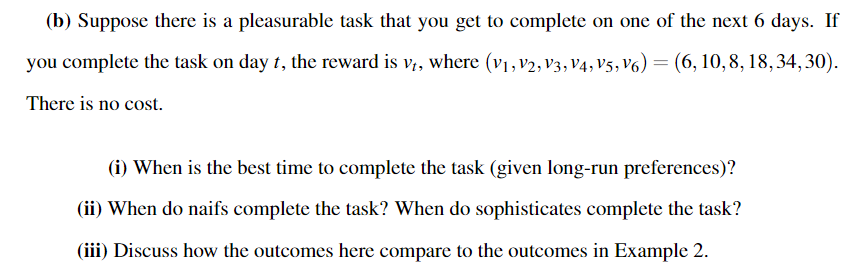

A pleasure-seeking algorithm with $\beta=\delta=1$ will wait until day 5 to maximize pleasure, but we are fun-hungry monkeys. Fungry.

$$
U(1) = 6,\ 
U(2) = 5, \\
U(3) = 4, \ 
U(4) = 9, \\
U(5) = 17, \ 
U(6) = 15,
$$

(i) Despite our fungriness, we still end up valuing day 5 the most.

(ii) Naifs will hit a roadblock on day 4: $U_4(4)=18$, so they won't make it to the final day. Sophisticates cannot control their future selfs, and fall into the same trap ($U(4)$ is still the least bad according to original prefrences)

(iii) In example 2, the naif ended up in a better position than the sophisticate, but here the sophisticate ends up in the same place since they value period 4 at all previous periods

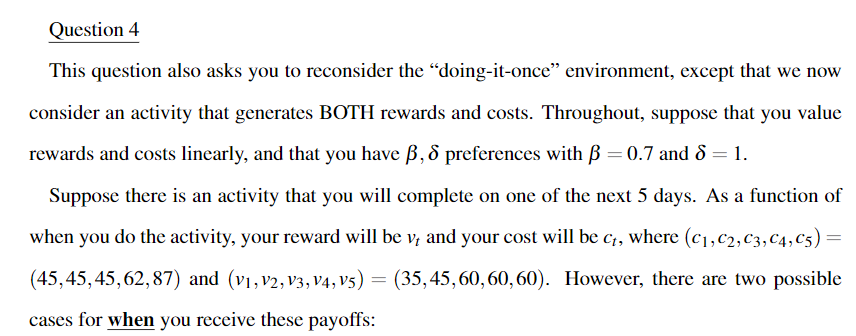
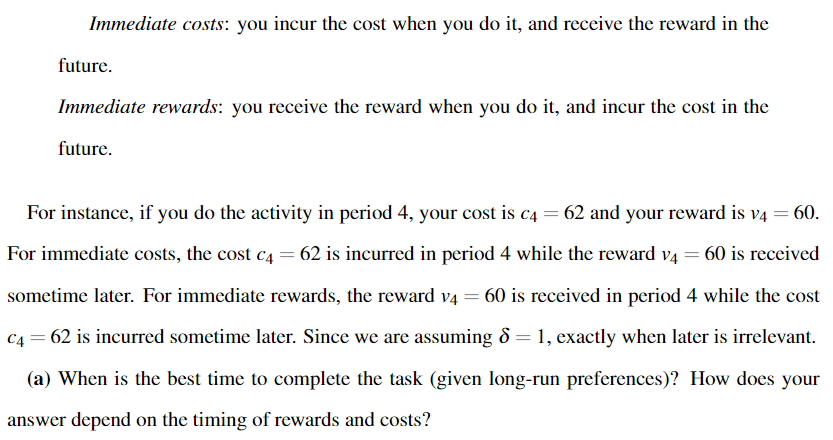

We are dealing with two sets of outcomes - immediate costs and immediate rewards. 

Immediate costs: $\beta$ is applied to reward upon action period. As such, all rewards are multiplied by $\beta$ 

$Uic(1:5)=[-20.5, 0.0, 10.5, -1.4, -18.9]$. Best reward: period 3

Immediate rewards: $\beta$ is applied to cost upon action period. As such, all costs are multiplied by $\beta$

$Uir(1:5)=[3.5, 0.0, 10.5, -1.4, -18.9]$. Best reward: period 3

Calculations come from code at the bottom of the page


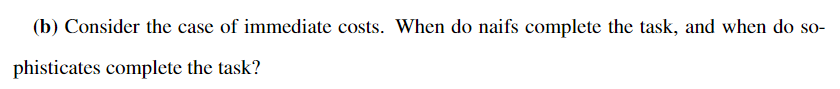

Lets check out the naifs. By period 3, period 4 looks nicer $U_3(3:5)=[-3,-1.4,-18.9]$. By period 4, period 5 looks nicer. They ends up in their second-to-worst situation, the final period. 
<!-- For instant-rewards they get stuck in period 2. -->

The all-wise sophisticate wishes to obtain period 3. Fortunately, their period 3 self is still a sophisticate and devalues period 5 below period 4, so they'll end up acting in period 3 and successfully hit the ideal completion period 

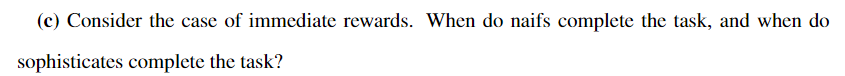

Naif: By period 2, $U_2(2)=13.5$ is the highest value, and they complete the task

Soph: Sophs value period 1 over period 2, so they complete the task in period 1

In [1]:
import numpy as np

period = np.array([1,2,3,4,5])
c = np.array([45,45,45,62,87])
v = np.array([35,45,60,60,60])

#data = np.array([period,c,v])

beta = 0.7

In [2]:
Uic = [] # Generates results for part a
Current_period = 1

for p in period:
    i = p-1

    if p == Current_period:
        Uic.append(beta*v[i]-c[i])
    if p >> Current_period:
        Uic.append(beta*(v[i]-c[i]))

Uir = []
for p in period:
    i = p-1

    if p == Current_period:
        Uir.append(v[i]-beta*c[i])
    if p >> Current_period:
        Uir.append(beta*(v[i]-c[i]))



In [3]:
print(Uic,Uir)

[-20.5, 0.0, 10.5, -1.4, -18.9] [3.5000000000000036, 0.0, 10.5, -1.4, -18.9]


In [4]:
Uic_futures = [] # Generates results for part b
Uir_futures = []


for now in period:
    Uic = [] 
    Current_period = now

    for p in period:
        i = p-1

        if p == Current_period:
            Uic.append(beta*v[i]-c[i])
        if p > Current_period:
            Uic.append(beta*(v[i]-c[i]))
    Uic_futures.append(Uic)

    Uir = []
    for p in period:
        i = p-1

        if p == Current_period:
            Uir.append(v[i]-beta*c[i])
        if p > Current_period:
            Uir.append(beta*(v[i]-c[i]))
    Uir_futures.append(Uir)



In [5]:
print(Uic_futures)
print(Uir_futures)

[[-20.5, 0.0, 10.5, -1.4, -18.9], [-13.500000000000004, 10.5, -1.4, -18.9], [-3.0, -1.4, -18.9], [-20.0, -18.9], [-45.0]]
[[3.5000000000000036, 0.0, 10.5, -1.4, -18.9], [13.500000000000004, 10.5, -1.4, -18.9], [28.500000000000004, -1.4, -18.9], [16.6, -18.9], [-0.8999999999999986]]


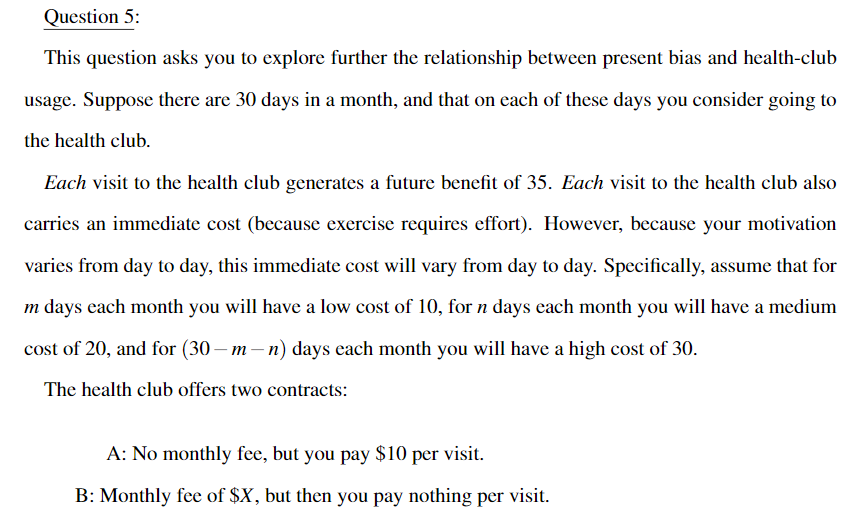 <br>
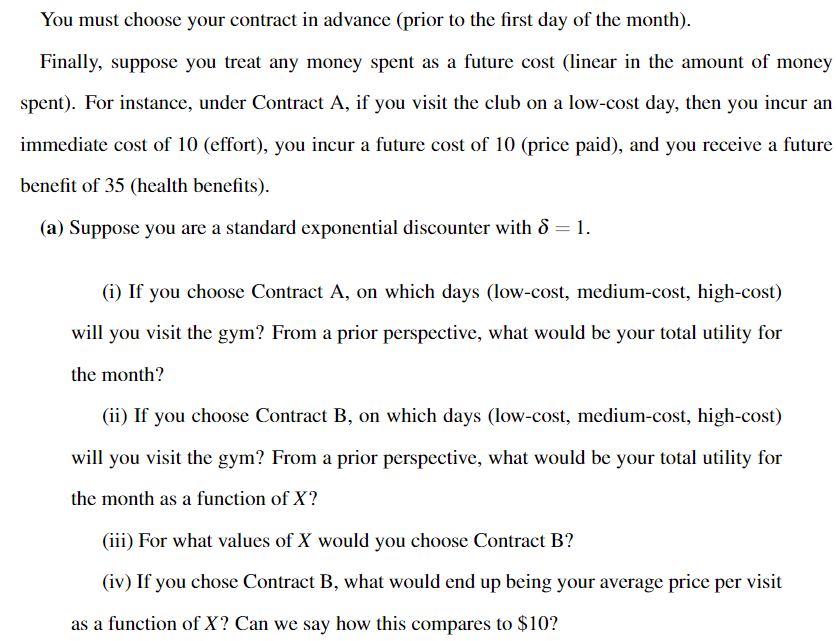